<a href="https://colab.research.google.com/github/yustinaivanova/math_netology/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Математика для Data Science.
# Домашнее задание №2.

Загрузим датасет о ценах на дома в Бостоне. 

In [136]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [137]:
"""
Посмотрим на названия атрибутов"""

boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Каждый дом - это вектор в 13-мерном пространстве. 
Написать код для подсчета скалярного произведения двух первых домов и датасета.

In [138]:
x1 = boston.data[0] # дом 1
x2 = boston.data[1] # дом 2

In [139]:
x1,x2

(array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]),
 array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00]))

Посчитаем скалярное произведение векторов через их координаты

In [140]:
scal=0
for i in range(len(x1)):
    scal+=x1[i]*x2[i]
scal

234704.86490859918

Нарисовать два дома в 3-мерном пространстве (атрибуты выбрать самостоятельно)

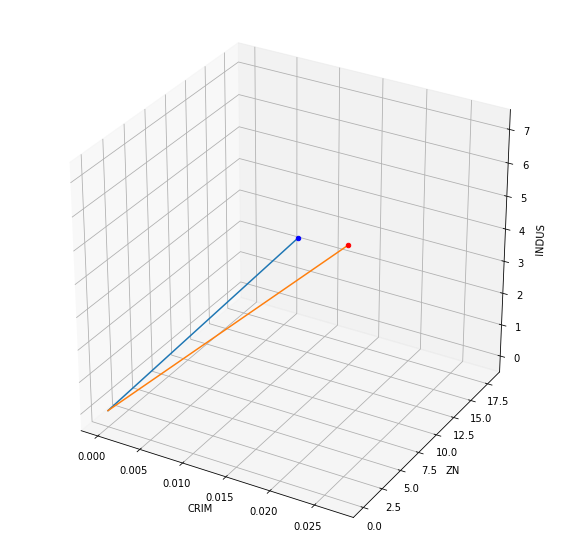

In [141]:
"""
Для построения трехмерной модели выбираю первые три аттрибута каждого дома-вектора"""

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')


ax.plot([0,x1[0]], [0,x1[1]], [0,x1[2]])
ax.plot([0,x2[0]], [0,x2[1]], [0,x2[2]])

ax.scatter(x1[0], x1[1], x1[2], c='b', marker='o')
ax.scatter(x2[0], x2[1], x2[2], c='r', marker='o')

ax.set_xlabel(boston.feature_names[0])
ax.set_ylabel(boston.feature_names[1])
ax.set_zlabel(boston.feature_names[2])

plt.show()

Найти косинус угла между векторами x1 и x2

In [142]:
"""
Допускаю, что в где-то в абстрактном мире существует 13-мерное измерение, где между векторами можно посчитать угол, 
а между точками измерить расстояние, и это может найти применение на практике в DS.
Поэтому следующие 2 задания выполню как для 13-мерного, так и для 3-мерного пространства

Косинус угла между векторами равен частному от деления скалярного произведения этих векторов на произведение их длин

Скалярное произведение мы уже вычислили (scal)
Посчитаем длины векторов"""

x1_len=0
x2_len=0
for i in range(len(x1)):
    x1_len+=x1[i]**2
    x2_len+=x2[i]**2
x1_len=x1_len**0.5
x2_len=x2_len**0.5

"""
Теперь вычислим косинус угла"""

cosinus=scal/(x1_len*x2_len)
cosinus

0.994296998616362

In [143]:
"""
То же самое, но для трехмерного представления (выбираем первые 3 атрибута)

1. Длины векторов          """

x1_len=0
x2_len=0
for i in range(3):
    x1_len+=x1[i]**2
    x2_len+=x2[i]**2
x1_len=x1_len**0.5
x2_len=x2_len**0.5

"""
2. Скалярное произведение          """

scal=0
for i in range(3):
    scal+=x1[i]*x2[i]

"""
3. Косинус угла между векторами             """

cosinus=scal/(x1_len*x2_len)
cosinus

0.1272898087858852

Найти расстояние между точками x1 и x2.

In [144]:
"""
Сначала для 13-мерного пространства:    

1. Посчитаем вектор, образованный двумя точками   """

X=x1-x2

"""
2. Найдем его длину, т.е. расстояние между точками    """

X_len=0
for i in range(len(X)):
    X_len+=X[i]**2
X_len=X_len**0.5
X_len

58.955079696240766

In [145]:
"""
Теперь то же самое для 3-мерного пространства по первым трем атрибутам векторов x1 и х2  """

X_len=0
for i in range(3):
    X_len+=X[i]**2
X_len=X_len**0.5
X_len

18.618755076000653

# Задание повышенного уровня.

Задан объект в пространстве 2D. 
Изменить положение объекта (сместить по оси x на 300 пикселей, по оси y на 200 пикселей).

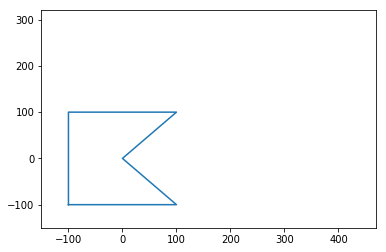

In [146]:
import numpy as np
import matplotlib.pyplot as plt

A = [
    [-100, -100, 1],
    [-100, 100, 1],
    [100, 100, 1],
    [0, 0, 1],
    [100, -100, 1],
    [-100, -100, 1]
    ]
A = np.array(A)
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
# plt.axis('equal')
plt.ylim([-150, 320])
plt.xlim([-150, 470])

plt.show()

Задачу можно решить двумя способами

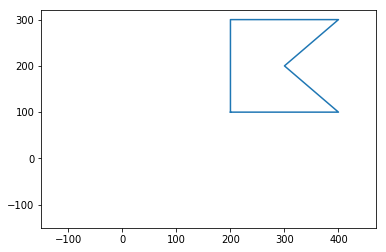

In [147]:
"""
1. Просто смещаем все точки на вектор (300, 200)"""

x2=x+300
y2=y+200

plt.plot(x2, y2)
plt.ylim([-150, 320])
plt.xlim([-150, 470])
plt.show()

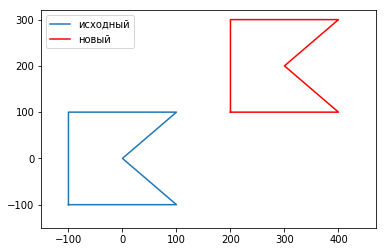

In [148]:
"""
2. Применяем матрицу смещения"""

TransformArray = np.array([
    [1, 0, 300],
    [0, 1, 200],
    [0, 0, 1]       ])

"""
Каждую точку фигуры умножаем на матрицу смещения и записываем в новый массив В  """

B = []
for point in A:
    new_point=np.dot(TransformArray,np.transpose(point))
    B.append((new_point))
B=np.array(B)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
x = B[:,0]
y = B[:,1]
plt.plot(x, y, color='r')
plt.ylim([-150, 320])
plt.xlim([-150, 470])
plt.legend(['исходный','новый'])
plt.show()

Уменьшить объект в два раза.

In [149]:
""" 
Все то же самое, но матрица трансформации содержит изменения на главной диагонали  """

TransformArray = np.array([
    [0.5, 0, 0],
    [0, 0.5, 0],
    [0, 0, 1]
])

In [150]:
B = []
for point in A:
    new_point=np.dot(TransformArray,np.transpose(point))
    B.append(new_point)
B = np.array(B)

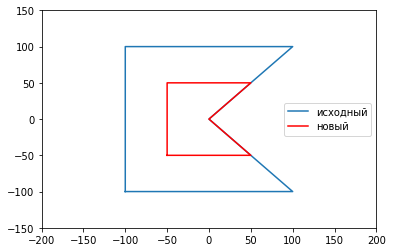

In [151]:
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
x = B[:,0]
y = B[:,1]
plt.plot(x, y, color='r')
plt.ylim([-150, 150])
plt.xlim([-200, 200])
plt.legend(['исходный','новый'])
plt.show()

Повернуть на 130 градусов.

In [152]:
"""
Снова то же самое, но изменения в матрице трансформации  """

from math import cos, sin, pi

angle = 130 * 180/pi
TransformArray = np.array([
    [cos(angle), sin(angle),  0],
    [-sin(angle), cos(angle), 0],
    [0,            0,         1]           ])

In [153]:
B = []
for point in A:
    new_point=np.dot(TransformArray,np.transpose(point))
    B.append(new_point)
B = np.array(B)

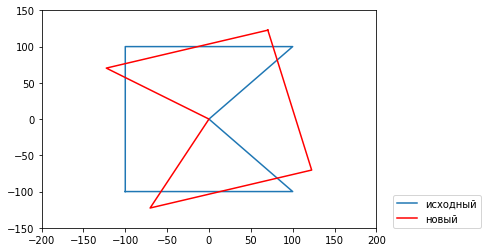

In [154]:
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
x = B[:,0]
y = B[:,1]
plt.plot(x, y, color='r')
plt.ylim([-150, 150])
plt.xlim([-200, 200])
plt.legend(['исходный','новый'], loc=(1.05, 0.0))

plt.show()

Отразить объект относительно прямой y=x

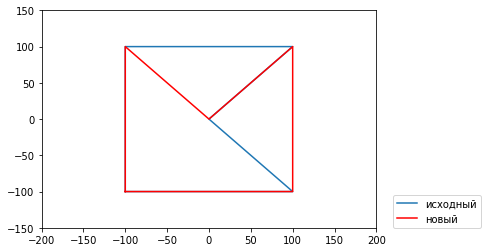

In [155]:
"""
1. Для решения этой задачи просто меняем координаты х и у местами"""

B = []
for point in A:
    new_point=[point[1],point[0],point[2]]
    B.append(new_point)
B = np.array(B)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
x = B[:,0]
y = B[:,1]
plt.plot(x, y, color='r')
plt.ylim([-150, 150])
plt.xlim([-200, 200])
plt.legend(['исходный','новый'], loc=(1.05, 0.0))
plt.show()

In [156]:
"""
2. Ну или применим полученные знания и решим задачу через матрицу трансформации  """

TransformArray = np.array([
    [0, 1, 0],
    [1, 0, 0],
    [0, 0, 1]           ])

In [157]:
B = []
for point in A:
    new_point=np.dot(TransformArray,np.transpose(point))
    B.append(new_point)
B = np.array(B)

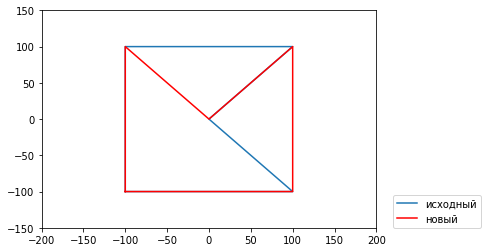

In [158]:
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
x = B[:,0]
y = B[:,1]
plt.plot(x, y, color='r')
plt.ylim([-150, 150])
plt.xlim([-200, 200])
plt.legend(['исходный','новый'], loc=(1.05, 0.0))
plt.show()